1 часть. 
Оценка правильности выбранного набора для решения задачи.
Для выполнения работы возьмем датасет из л/р №2.
а) Поиск целевого класса среди атрибутов.

В качестве целевого класса, то есть метки, выберем атрибут 'Gender' (пол сотрудника), который будет предсказываться на основе таких
данных о сотруднике как 'Education Level' (уровень образования), 'Years of Experience' (опыт работы), 'Salary' (зарплата), 
'Year of Birth' (год рождения) и 'Age' (возраст).

In [20]:
# Проверка на правильность содержащихся данных в файле

import numpy as np
import pandas as pd
df = pd.read_csv ('C:/Users/саша/Desktop/3 КУРС/МАШ ОБУЧЕНИЕ/Salary_Data2.csv')
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Year of Birth
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,1991.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,1995.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,1978.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,1987.0
4,52.0,Male,Master's,Director,20.0,200000.0,1971.0


b) Оценка сбалансированности целевого класса.

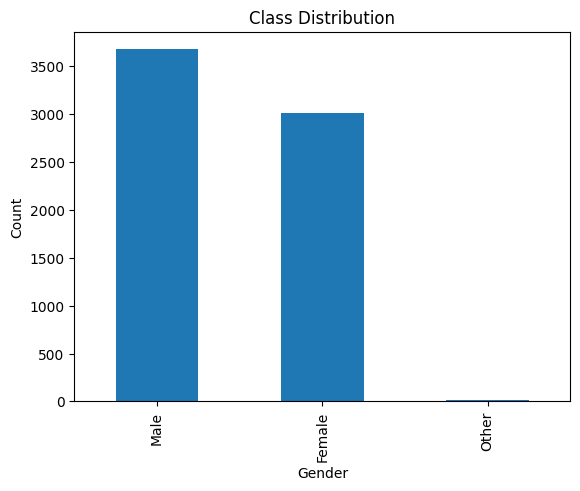

Классы не сбалансированы.


In [78]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка датасета из csv файла
data = pd.read_csv('C:/Users/саша/Desktop/3 КУРС/МАШ ОБУЧЕНИЕ/Salary_Data2.csv')

# Подсчет количества примеров в классе
class_counts = data['Gender'].value_counts()

# Определение сбалансированности класса
is_balanced = (class_counts.min() / class_counts.max()) >= 0.5

class_counts.plot(kind='bar')
# plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()


if is_balanced:
    print("Классы сбалансированы.")
else:
    print("Классы не сбалансированы.")

2 часть.

Описание данной подзадачи по шагам: 
1) Импортируем нужные библиотеки, затем переводим нужные атрибуты в числовые значения при помощи функции 
pd.numeric;
2) Задаем переменную predictors с признаками для предсказания и переменную outcome с целевым классом;
3) Выбираем первую запись в качестве записи предсказания и разделяем данные на переменную X и целевую переменную y;
4) Удаляем пропущенные значения и заполняем пропуски средними значениями с помощью SimpleImputer;
5) Преобразуем входные данные в двумерный массив при помощи метода reshape;
6) Ставим условия для вывода пола сотрудника словами, а не цифрами;
7) Создаем экземпляр классификатора KNeighborsClassifier с параметром n_neighbors=20;
8) Обучаем модель kNN на данных X и y, пПрогнозирумт класс для новой записи new_record и выводмт предполагаемый по;
9) Создаем диаграмму вероятностей.

a) Оценка и сравнение результатов классификации при помощи алгоритма knn (метод k-ближайших соседей).


Прогноз класса: Male


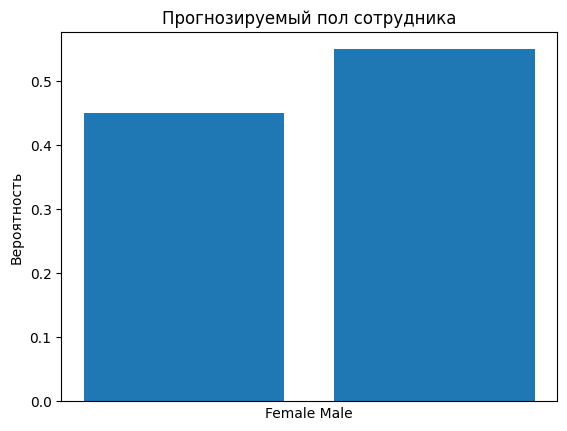

In [76]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка датасета
df = pd.read_csv('C:/Users/саша/Desktop/3 КУРС/МАШ ОБУЧЕНИЕ/Salary_Data2.csv')

df['Education Level'] = df['Education Level'].replace({"Bachelor's": 3, "Master's": 4, "Bachelor's Degree": 5, "Master's Degree": 6, "High School": 2, "PhD": 7, "phD": 8})
df['Education Level'] = pd.to_numeric(df['Education Level'], errors='coerce')
df['Gender'] = df['Gender'].replace({"Male": 1, "Female": 0})
df['Gender'] = pd.to_numeric(df['Gender'], errors='coerce')

df_new = df.drop(['Job Title'], axis=1)

predictors = ['Education Level', 'Salary', 'Age', 'Years of Experience', 'Year of Birth'] 
outcome = 'Gender'

# Разделение данных
new_record = df_new.loc[0:0, predictors] 
X = df_new.loc[1:, predictors] 
y = df_new.loc[1:, outcome] 

# Удаление пропущенных значений из X и y
df_new.dropna(subset=predictors+[outcome], inplace=True)
X = df_new[predictors]
y = df_new[outcome]

# Заполнение пропущенных значений средними значениями
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)
#y = y.values.reshape(-1, 1)
y = y.values.ravel()

new_record = imputer.transform(new_record)

# Изменение формы входных данных на двумерный массив
new_record = new_record.reshape(1, -1)
X = X.reshape(-1, len(predictors))

# Прогнозирование класса для новой записи
prediction = kNN.predict(new_record)
if prediction[0] == 1:
    gender_prediction = "Male"
else:
    gender_prediction = "Female"
print(f"Прогноз класса: {gender_prediction}")

kNN = KNeighborsClassifier(n_neighbors=20) 
kNN.fit(X, y) 
predictions_kNN = kNN.predict(new_record)
probabilities = kNN.predict_proba(new_record)

# Создание столбчатой диаграммы вероятностей
classes = kNN.classes_
plt.bar(classes, probabilities[0])
plt.xlabel('Female Male')
plt.ylabel('Вероятность')
plt.title('Прогнозируемый пол сотрудника')
plt.xticks([])
plt.show()


b) Оценка и сравнение результатов классификации при помощи алгоритма Дерева решений.

Прогноз класса: Male


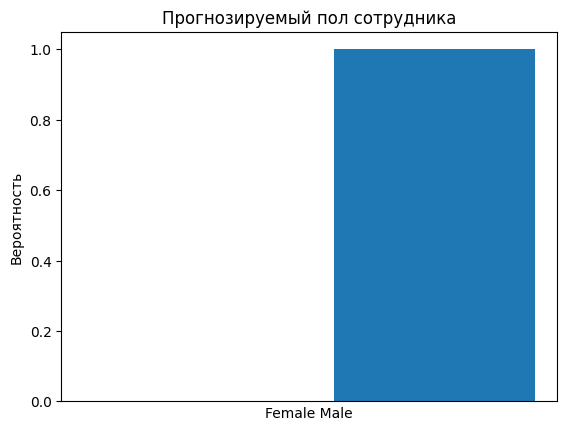

In [77]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer

# Загрузка датасета
df = pd.read_csv('C:/Users/саша/Desktop/3 КУРС/МАШ ОБУЧЕНИЕ/Salary_Data2.csv')

df['Education Level'] = df['Education Level'].replace({"Bachelor's": 3, "Master's": 4, "Bachelor's Degree": 5, "Master's Degree": 6, "High School": 2, "PhD": 7, "phD": 8})
df['Education Level'] = pd.to_numeric(df['Education Level'], errors='coerce')
df['Gender'] = df['Gender'].replace({"Male": 1, "Female": 0})
df['Gender'] = pd.to_numeric(df['Gender'], errors='coerce')

df_new = df.drop(['Job Title'], axis=1)

predictors = ['Education Level', 'Salary', 'Age', 'Years of Experience', 'Year of Birth'] 
outcome = 'Gender'

new_record = df_new.loc[0:0, predictors] 
X = df_new.loc[1:, predictors] 
y = df_new.loc[1:, outcome] 

# Удаление пропущенных значений из X и y
df_new.dropna(subset=predictors+[outcome], inplace=True)
X = df_new[predictors]
y = df_new[outcome]

# Заполнение пропущенных значений средними значениями
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)
y = y.values.ravel()

new_record = imputer.transform(new_record)

# Изменение формы входных данных на двумерный массив
new_record = new_record.reshape(1, -1)
X = X.reshape(-1, len(predictors))


prediction = tree.predict(new_record)
if prediction[0] == 1:
    gender_prediction = "Male"
else:
    gender_prediction = "Female"
print(f"Прогноз класса: {gender_prediction}")

tree = DecisionTreeClassifier()
tree.fit(X, y) 
predictions_tree = tree.predict(new_record)
probabilities = tree.predict_proba(new_record)

# Создание столбчатой диаграммы вероятностей
classes = tree.classes_
plt.bar(classes, probabilities[0])
plt.xlabel('Female Male')
plt.ylabel('Вероятность')
plt.title('Прогнозируемый пол сотрудника')
plt.xticks([])
plt.show()


Результаты исследования датасета при помощи этих двух алгоритмов отличаются, хотя в обоих случаях выше вероятность
сотрудника мужского пола:
алгоритм kNN (метод k-ближайших соседей) предсказал пол сотрудника таким образом: Female - 45%, Male - 55%, 
а алгорим Дерева Решений таким: Female - 0%, Male - 100%.

Возможно, такие различия связаны с тем, что данные методы могут требовать различной обработки данных,
методы имеют разные влияющие на них параметры, а также они имеют разную устойчивость к выбросам: метода knn менее устойчив.

3. Сравнение результатов классификации при помощи различных метрик оценки качества

Описание подзадачи по шагам: до создания классификаторов подзадача не отличается от предыдущей, с 
7 шага происходит следующее:
7) Создаем экземпляр классификатора KNeighborsClassifier (алгоритм k-ближайших соседей) с параметром n_neighbors=20;8). Обучамт модель kNN на данных X и y, где X - признаки, а y - целевая переменна;.9)3. Прогнозирм т класс для новой записи new_record с помощью модели kNN и сохранмет результаты в predictions_k;N10)
4. Созмает экземпляр классификатора DecisionTreeClassifier (алгоритм дерева решен;й11)
5. Обмчает модель tree на данных X;и12).
6. Прогномирует класс для новой записи new_record с помощью модели tree и сохраняет результаты в predictions;t13)e.
7. Вымисляет значение точности (accuracy) для моделей kNN ,  tree сравнивая предсказания с истинными значениями y с помощью функции accuracy;s14)re.
8.мВыводит значения точности для моделей kNN и tree.

 
а) Accuracy

In [83]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.metrics import accuracy_score

# Загрузка датасета
df = pd.read_csv('C:/Users/саша/Desktop/3 КУРС/МАШ ОБУЧЕНИЕ/Salary_Data2.csv')

df['Education Level'] = df['Education Level'].replace({"Bachelor's": 3, "Master's": 4, "Bachelor's Degree": 5, "Master's Degree": 6, "High School": 2, "PhD": 7, "phD": 8})
df['Education Level'] = pd.to_numeric(df['Education Level'], errors='coerce')
df['Gender'] = df['Gender'].replace({"Male": 1, "Female": 0})
df['Gender'] = pd.to_numeric(df['Gender'], errors='coerce')

df_new = df.drop(['Job Title'], axis=1)

predictors = ['Education Level', 'Salary', 'Age', 'Years of Experience', 'Year of Birth'] 
outcome = 'Gender'

new_record = df_new.loc[0:0, predictors] 
X = df_new.loc[1:, predictors] 
y = df_new.loc[1:, outcome] 

# Удаление пропущенных значений из X и y
df_new.dropna(subset=predictors+[outcome], inplace=True)
X = df_new[predictors]
y = df_new[outcome]

# Заполнение пропущенных значений средними значениями
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)
y = y.values.ravel()

new_record = imputer.transform(new_record)

# Изменение формы входных данных на двумерный массив
#new_record = new_record.reshape(1, -1)
new_record = np.tile(new_record, (len(X), 1))
X = X.reshape(-1, len(predictors))

kNN = KNeighborsClassifier(n_neighbors=20) 
kNN.fit(X, y) 
predictions_kNN = kNN.predict(new_record)

tree = DecisionTreeClassifier()
tree.fit(X, y) 
predictions_tree = tree.predict(new_record)

# Расчет Accuracy
knn_accuracy = accuracy_score(y, predictions_kNN)
dt_accuracy = accuracy_score(y, predictions_tree)

# Вывод результатов
print("Accuracy для kNN:",knn_accuracy)
print("Accuracy для Дерева Решений:",dt_accuracy)

Accuracy для kNN: 0.5493568650912354
Accuracy для Дерева Решений: 0.5493568650912354


Метрика Accuracy (точность) измеряет долю правильно классифицированных образцов от общего числа образцов. 
Для данного датасета получилось так, что оба метода имеют одинаковую оценку качества, 
это может говорить о том, что модели правильно классифицируют одинаковое количество образцов и делают ошибки на одних и тех же образцах.

b) ROC

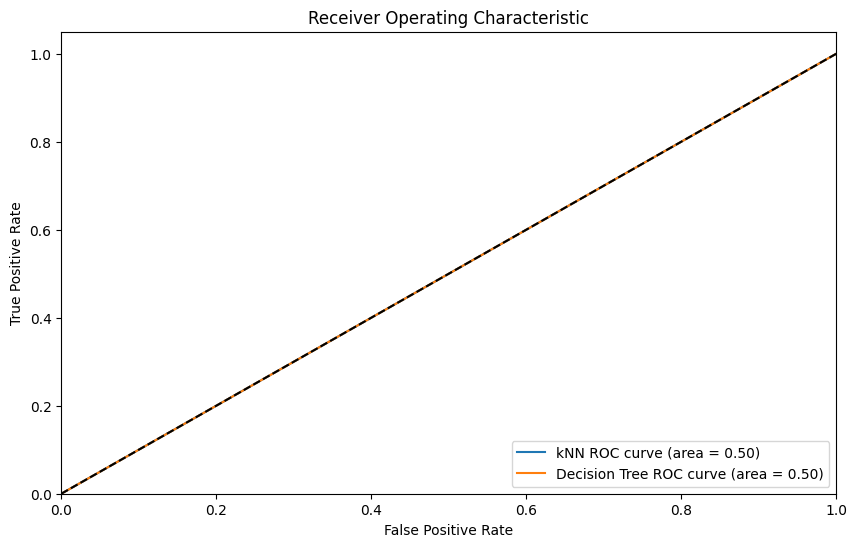

ROC для kNN: 0.5
ROC для Дерева Решений: 0.5


In [89]:
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
kNN = KNeighborsClassifier(n_neighbors=20) 
kNN.fit(X, y) 
predictions_kNN = kNN.predict(new_record)

tree = DecisionTreeClassifier()
tree.fit(X, y) 
predictions_tree = tree.predict(new_record)

# Расчет ROC
knn_roc = roc_auc_score(y, predictions_kNN, average='weighted')
dt_roc = roc_auc_score(y, predictions_tree, average='weighted')

# Построение ROC-кривой
knn_fpr, knn_tpr, _ = roc_curve(y, predictions_kNN)
dt_fpr, dt_tpr, _ = roc_curve(y, predictions_tree)

plt.figure(figsize=(10, 6))
plt.plot(knn_fpr, knn_tpr, label='kNN ROC curve (area = %0.2f)' % knn_roc)
plt.plot(dt_fpr, dt_tpr, label='Decision Tree ROC curve (area = %0.2f)' % dt_roc)
plt.plot([0, 1], [0, 1], 'k--')  # ROC-кривая случайной модели
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Вывод результатов
print("ROC для kNN:",knn_roc)
print("ROC для Дерева Решений:",dt_roc)

ROC-кривые подтверждают значения метрики для обоих методов: они представляют собой линейные функции и делят область на правильно 
классифицированные образцы (True Positive Rate) и не правильно класифицированные (False Positive Rate) в соотношении 
примерно 50% на 50%.

Метрика ROC показала одинаковые результаты для обоих методов и ее значение близко к значению метрики Accuracy.

c) Precision

In [85]:
kNN = KNeighborsClassifier(n_neighbors=20) 
kNN.fit(X, y) 
predictions_kNN = kNN.predict(new_record)

tree = DecisionTreeClassifier()
tree.fit(X, y) 
predictions_tree = tree.predict(new_record)

# Расчет Precision
knn_pr = precision_score(y, predictions_kNN, average='binary')
dt_pr = precision_score(y, predictions_tree, average='binary')

# Вывод результатов
print("Precision для kNN:",knn_pr)
print("Precision для Дерева Решений:",dt_pr)

Precision для kNN: 0.5493568650912354
Precision для Дерева Решений: 0.5493568650912354


Метрика Precision показала одинаковые значения для обоих методов.

In [ ]:
c) F-Measure

In [86]:
kNN = KNeighborsClassifier(n_neighbors=20) 
kNN.fit(X, y) 
predictions_kNN = kNN.predict(new_record)

tree = DecisionTreeClassifier()
tree.fit(X, y) 
predictions_tree = tree.predict(new_record)

# Расчет F-Measure
knn_f1 = f1_score(y, predictions_kNN, average='weighted')
dt_f1 = f1_score(y, predictions_tree, average='weighted')

# Вывод результатов
print("F-measure для kNN:",knn_f1)
print("F-measure для Дерева Решений:",dt_f1)

F-measure для kNN: 0.3895719211275427
F-measure для Дерева Решений: 0.3895719211275427


Метрика F-measure показала одинаковые значения для обоих методов.

In [ ]:
d) Recall

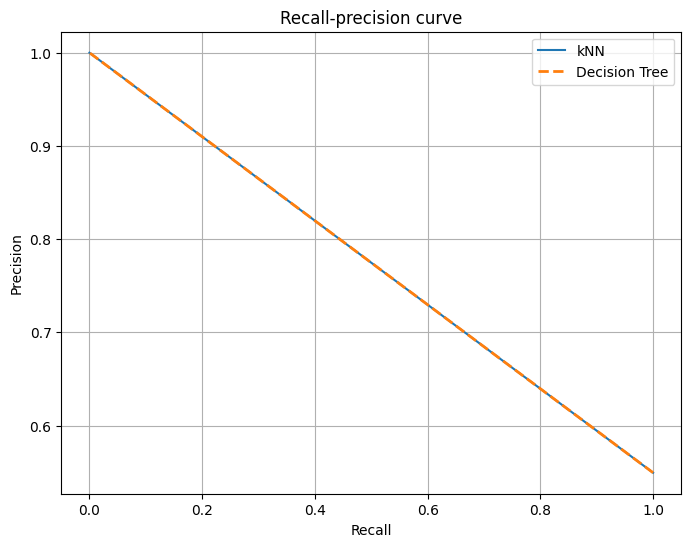

Recall для kNN: [1. 0.]
Recall для Дерева Решений: [1. 0.]


In [94]:
from sklearn.metrics import precision_recall_curve
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.metrics import accuracy_score

# Загрузка датасета
df = pd.read_csv('C:/Users/саша/Desktop/3 КУРС/МАШ ОБУЧЕНИЕ/Salary_Data2.csv')

df['Education Level'] = df['Education Level'].replace({"Bachelor's": 3, "Master's": 4, "Bachelor's Degree": 5, "Master's Degree": 6, "High School": 2, "PhD": 7, "phD": 8})
df['Education Level'] = pd.to_numeric(df['Education Level'], errors='coerce')
df['Gender'] = df['Gender'].replace({"Male": 1, "Female": 0})
df['Gender'] = pd.to_numeric(df['Gender'], errors='coerce')

df_new = df.drop(['Job Title'], axis=1)

predictors = ['Education Level', 'Salary', 'Age', 'Years of Experience', 'Year of Birth'] 
outcome = 'Gender'

new_record = df_new.loc[0:0, predictors] 
X = df_new.loc[1:, predictors] 
y = df_new.loc[1:, outcome] 

# Удаление пропущенных значений из X и y
df_new.dropna(subset=predictors+[outcome], inplace=True)
X = df_new[predictors]
y = df_new[outcome]

# Заполнение пропущенных значений средними значениями
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)
y = y.values.ravel()

new_record = imputer.transform(new_record)

# Изменение формы входных данных на двумерный массив
#new_record = new_record.reshape(1, -1)
new_record = np.tile(new_record, (len(X), 1))
X = X.reshape(-1, len(predictors))

kNN = KNeighborsClassifier(n_neighbors=20) 
kNN.fit(X, y) 
predictions_kNN = kNN.predict(new_record)

tree = DecisionTreeClassifier()
tree.fit(X, y) 
predictions_tree = tree.predict(new_record)



kNN = KNeighborsClassifier(n_neighbors=20) 
kNN.fit(X, y) 
predictions_kNN = kNN.predict(new_record)

tree = DecisionTreeClassifier()
tree.fit(X, y) 
predictions_tree = tree.predict(new_record)

# Расчет Recall
knn_recall = recall_score(y, predictions_kNN)
dt_recall = recall_score(y, predictions_tree)

# Plotting Recall-кривой
knn_precision, knn_recall, knn_thresholds = precision_recall_curve(y, predictions_kNN)
dt_precision, dt_recall, dt_thresholds = precision_recall_curve(y, predictions_tree)

plt.figure(figsize=(8, 6))
plt.plot(knn_recall, knn_precision, label='kNN')
plt.plot(dt_recall, dt_precision, label='Decision Tree', linestyle='--', linewidth=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Recall-precision curve')
plt.legend()
plt.grid(True)
plt.show()

# Вывод результатов
print("Recall для kNN:",knn_recall)
print("Recall для Дерева Решений:",dt_recall)

Recall-прямая показывает, что метрика не обнаружила неверно классифицированных образцов.
Возможно, это связано с тем, что разные метрики имеют разную чувствительность к несбалансированности классов,
выбросам и фокусируются на разных аспектах модели.
Метрика Recall показала одинаковые значения для обоих методов.

Вывод:
В данной работе было проведено исследование алгоритмов классификации и различных метрик оценки качества классификации.


Целевым классом (меткой) датасета стал пол сотрудника "Gender", который предсказывался на основе атрибутов'Education Level' (уровень образования), 'Years of Experience' (опыт работы), 'Salary' (зарплата), 'Year of Birth' (год рождения) и'Age' (возраст) при помощи 2 алгоритмов 
классификации: knn и Дерева Решений. 
Данные алгоритмы предсказали, что в большинстве случаев пол нового сотрудника будет мужским, но с разной вероятностью.
Это связано с тем, что данные методы могут требовать дополнительной подготовки данных и имеют разную устойчивость к выбросам: метод knn менее устойчив.


Также в данной работе были использованы различные метрики оценки качества классификации, которые показывают
измерения производительности модели и то, насколько хорошо модель классифицирует объекты на различные классы.
Были использованы такие метрики как: Accuracy (показывает, какая доля объектов была правильно классифицирована), 
Precision-точность и Recall-полнота (данные метрики взаимосвязаны, полнота показывает, какую долю объектов положительного 
класса была правильно классифицирована, а точность показывает, какая доля объектов, классифицированных как положительные, действительно является положительными; эти метрики хорошо использовать при несбалансированности классов), ROC (показывает, насколько хорошо модель различает между собой объекты разных классов) и F-measure (полезна, когда важно достичь баланса между полнотой и точностью).


Метрики Accuracy, Precision и ROC показали одинаковые значения для обоих методов: алгоритмы смогли правильно классифицировать
данные датасета на 50%, метрика F-measure показала 30%, а Recall - 100%.
Возможно, такие разные значения связаны с тем, что каждая метрика фокусируется на определенном аспекте, имеют разную чувстительность
к несбалансированности классов и подвержены влиянию шумов в разной степени. Для выбора наиболее подходящей метрики нужны дополнительные исследования.